In [473]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [474]:
hour_df = pd.read_csv('../datasets/hour.csv')
# del hour_df['dteday']
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [475]:
def x(r):
  if r in [1, 2, 12]:
    return "winter"
  elif r in [3, 4, 5]:
    return "spring"
  elif r in [6, 7, 8]:
    return "summer"
  else:
    return "fall"
hour_df["season"] = hour_df["mnth"].apply(x)
# hour_df = pd.get_dummies(hour_df, prefix=['season'], columns = ['season'], drop_first=True)

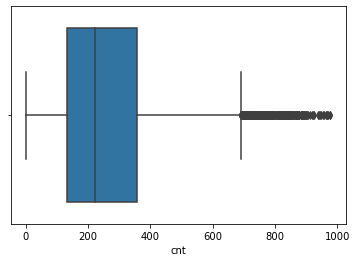

In [476]:
day_set_df = hour_df[(hour_df['hr'] > 6) & (hour_df['hr'] < 23)]
sns.boxplot(x=day_set_df['cnt'])

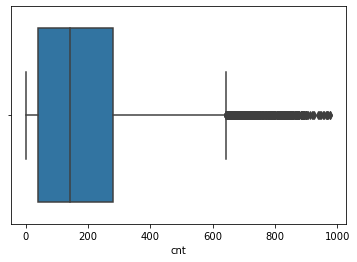

In [477]:
sns.boxplot(x=hour_df['cnt'])

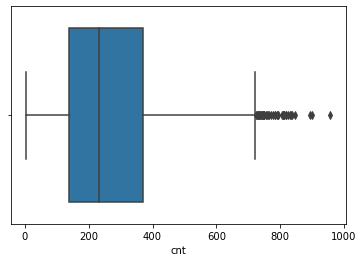

In [478]:
sns.boxplot(x=day_set_df[(hour_df['weekday'] == 5) | (hour_df['weekday'] == 6)]['cnt'])

In [479]:
# Logistic 
# Decision Tree
#  - 

total_perc = 0
ranges = [0, 100, 300, 500, 1000]
cols = []
for idx, val in enumerate(ranges):
    if (val == ranges[len(ranges) - 1]):
        break;

    x1 = val
    x2 = ranges[idx + 1]

    val = ((hour_df['cnt'] >= x1) & (hour_df['cnt'] < x2)).sum()
    val = val / len(hour_df)

    col="%d-%d" % (x1, x2)
    cols.append(col)

    print("%d - %d = %.4f" % (x1, x2, val))
    total_perc += val

    hour_df["%d-%d" % (x1, x2)] = ((hour_df['cnt'] >= x1) & (hour_df['cnt'] < x2)).astype(int)

    
print("Covered Data > " + str(total_perc))
hour_df

0 - 100 = 0.4034
100 - 300 = 0.3710
300 - 500 = 0.1516
500 - 1000 = 0.0741
Covered Data > 1.0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,0-100,100-300,300-500,500-1000
0,1,2011-01-01,winter,0,1,0,0,6,0,1,...,0.2879,0.81,0.0000,3,13,16,1,0,0,0
1,2,2011-01-01,winter,0,1,1,0,6,0,1,...,0.2727,0.80,0.0000,8,32,40,1,0,0,0
2,3,2011-01-01,winter,0,1,2,0,6,0,1,...,0.2727,0.80,0.0000,5,27,32,1,0,0,0
3,4,2011-01-01,winter,0,1,3,0,6,0,1,...,0.2879,0.75,0.0000,3,10,13,1,0,0,0
4,5,2011-01-01,winter,0,1,4,0,6,0,1,...,0.2879,0.75,0.0000,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,1,12,19,0,1,1,2,...,0.2576,0.60,0.1642,11,108,119,0,1,0,0
17375,17376,2012-12-31,winter,1,12,20,0,1,1,2,...,0.2576,0.60,0.1642,8,81,89,1,0,0,0
17376,17377,2012-12-31,winter,1,12,21,0,1,1,1,...,0.2576,0.60,0.1642,7,83,90,1,0,0,0
17377,17378,2012-12-31,winter,1,12,22,0,1,1,1,...,0.2727,0.56,0.1343,13,48,61,1,0,0,0


In [480]:
def print_conf_mtx(y_true, y_pred, classes=None):
    """ Print a confusion matrix (two classes only). """
    
    if not classes:
        classes = ['neg', 'pos']
   	 
    # formatting
    max_class_len = max([len(s) for s in classes])
    m = max(max_class_len, len('predicted')//2 + 1)
    n = max(len('actual')+1, max_class_len)
    left   	= '{:<10s}'.replace('10',str(n))
    right  	= '{:>10s}'.replace('10',str(m))
    big_center = '{:^20s}'.replace('20',str(m*2))
    
    cm = confusion_matrix(y_test, y_pred)
    print((left+big_center).format('', 'predicted'))
    print((left+right+right).format('actual', classes[0], classes[1]))
    print((left+right+right).format(classes[0], str(cm[0,0]), str(cm[0,1])))
    print((left+right+right).format(classes[1], str(cm[1,0]), str(cm[1,1])))

In [481]:
hour_df["time"] = hour_df.apply(lambda row: (datetime.strptime(row["dteday"] + ":" + str(row["hr"]), '%Y-%m-%d:%H')).timestamp(), axis=1)
hour_df = hour_df.drop(columns=["dteday", "atemp", "registered", "casual", "holiday", "instant", "cnt"])
hour_df = pd.get_dummies(data = hour_df, columns = ["season", "weathersit", "weekday"])

In [482]:
targets = cols
print(targets)

# hour_df.columns.apply(lambda col: print(col))
predictors = [col for col in hour_df.columns if not (col in cols)]
print(predictors)

X = hour_df[predictors].values
y = hour_df[targets].values
X_s = zscore(X)

X_train, X_test, y_trains, y_tests = train_test_split(X_s, y, test_size=0.30, random_state=42)

['0-100', '100-300', '300-500', '500-1000']
['yr', 'mnth', 'hr', 'workingday', 'temp', 'hum', 'windspeed', 'time', 'season_fall', 'season_spring', 'season_summer', 'season_winter', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']


In [486]:
for i in range(len(ranges) - 1):
    y_train = y_trains[:,i]
    y_test = y_tests[:,i]
    print(targets[i])
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    accuracy = (y_predict == y_test).mean()
    print('Accuracy > ' + str(accuracy))
    print_conf_mtx(y_train, y_predict)
    print('')
    

0-100
Accuracy > 0.8084004602991944
       predicted 
actual   neg  pos
neg     2584  486
pos      513 1631

100-300
Accuracy > 0.6388569236670503
       predicted 
actual   neg  pos
neg     2630  659
pos     1224  701

300-500
Accuracy > 0.8517453011123898
       predicted 
actual   neg  pos
neg     4409   26
pos      747   32

500-1000
Accuracy > 0.9278864595320292
       predicted 
actual   neg  pos
neg     4832   16
pos      360    6

